In [1]:
from __future__ import division, print_function
from keras import backend as K
from keras.applications import inception_v3
from keras.callbacks import ModelCheckpoint
from keras.layers import Input, merge
from keras.layers.core import Activation, Dense, Dropout, Lambda
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from random import shuffle
from scipy.misc import imresize
import itertools
import matplotlib.pyplot as plt
import numpy as np
import os
%matplotlib inline


DATA_DIR = ""
IMAGE_DIR = os.path.join(DATA_DIR, "new_new_test_folder")


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
BEST_MODEL_FILE = os.path.join(DATA_DIR, "models", "A_A_inceptionv3-l1-f-best_100_args6.h5")
FINAL_MODEL_FILE = os.path.join(DATA_DIR, "models", "A_A_inceptionv3-l1-f-final_100_args6.h5")

print("==== Evaluation Results: best model on test set ====")
best_model = load_model(BEST_MODEL_FILE)

==== Evaluation Results: best model on test set ====


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


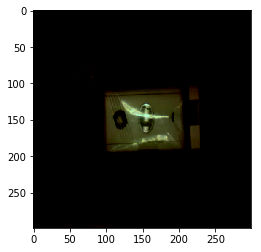

In [3]:
image_1 = plt.imread(os.path.join(IMAGE_DIR, '/home/ubuntu/siamese/fine_tune_folder/F0O176505000B/PASS_F0O176505000B_1_20180702090312282.jpg'))
plt.imshow(image_1)
image_1 = imresize(image_1, (299, 299))
image_1 = image_1.astype("float32")
image_1 = inception_v3.preprocess_input(image_1)
plt.imshow(image_1)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  app.launch_new_instance()
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


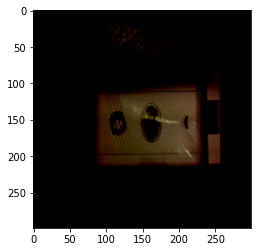

In [5]:
image_2 = plt.imread(os.path.join(IMAGE_DIR, '/home/ubuntu/siamese/fine_tune_folder/F0O176505000B/PASS_F0O176505000B_1_20180702090424563.jpg'))
plt.imshow(image_2)
image_2 = imresize(image_2, (299, 299))
image_2 = image_2.astype("float32")
image_2 = inception_v3.preprocess_input(image_2)
plt.imshow(image_2)

In [6]:
image_1 = image_1.reshape(1,299,299,3)
image_2 = image_2.reshape(1,299,299,3)

In [7]:
Ytest_ = best_model.predict([image_1, image_2])

In [8]:
# pass
Ytest_

array([[0.01341762, 0.9865824 ]], dtype=float32)